
# Project: No-show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I selected the No-show Appointments, because I have a medical background **as I study pharmacy.**
<br>
The selected data contains info about the patient, like: **age**, **gender**, if he/she has a **chronic disease**, **alcholic** or not, and if he/she has a **disability.**
<br>
It also has data about the **date of the appointment**, the **location of the hospital**, if the patient is **enrolled in Bolsa Famillia project**, and if the patient **attended or missed the appointment**.
> **The questions I asked are:**
> 1) is the gender of patients affects the missed appointments percentage?
> 
> 2) is having a disability increases the missed appointments precentage?
> 
> 3) Is having a chronic disease affects the missed appointments percentage?
> 
> 4) Is being alcoholic affects the missed appointments percentage?
> 
> 5) Are the patients enrolled in Bolsa Famillia Project go to thier appointments more than others?
>
> 6) Is there a specific day with high missed appointments percentage?
>
> 7) Is receving a SMS decreased missed appointments?
>
> 8) What hospital have the highest rate of missed appointments?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df= pd.read_csv("no_show.csv")

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#show the number of (rows, colmns)
df.shape

(110527, 14)

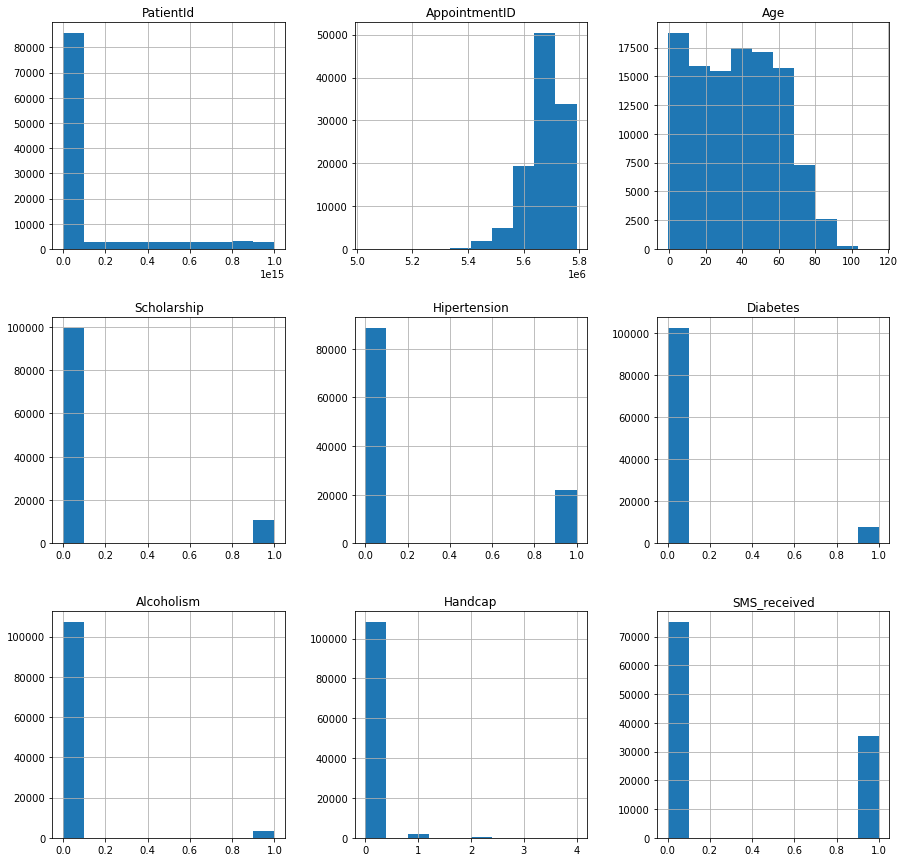

In [5]:
#visualize all data
df.hist(figsize= (15,15));

In [6]:
#Check for Duplicates
df.duplicated().sum()

0

***All data is unique***

In [7]:
#Check for null data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

***there is no null values***

In [8]:
#check for data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

***all values are fine, only appointmentday should be changed to datetime***

In [9]:
#full data using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


***So, there in no duplicates, and no null values***
> **to do:**
>
> 1) drop irrelevant data.
>
> 2) make the data more consistant
>
> 3) change No and Yes values to 0's and 1's in the No-show column "**missed_appointment**"
>
> 4) extract only the date from appointmentday column


### Data Cleaning

**1) drop irrelevant columns like patientId, AppointmentID. and ScheduledDay**

In [10]:
df.drop(["PatientId", "AppointmentID", "ScheduledDay"], axis= 1, inplace= True)

In [11]:
#see new data
df.head(1)

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


**2.1) lowering all columns letters**

In [12]:
df.rename(columns= lambda x: x.lower(), inplace= True)

In [13]:
#See new data
df.head(1)

,gender,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


**2.2) change appointmentday to appointment_day, no-show to missed_appointment, and correct misspilled hypertension and diabetes to its medical appreviation "HTN" and "DM" be more consistant and eliminate all possible missunderstanding**

In [14]:
df.rename(columns= {"appointmentday": "appointment_day", "no-show": "missed_appointment",
                    "hipertension": "HTN", "diabetes": "DM"}, inplace= True)

In [15]:
#see new data
df.head(1)

,gender,appointment_day,age,neighbourhood,scholarship,HTN,DM,alcoholism,handcap,sms_received,missed_appointment
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


**3) replace No and Yes with 0's and 1's in missed_appointment column**

In [16]:
df["missed_appointment"].replace({"No": 0, "Yes": 1}, inplace= True)

In [17]:
#check for new date
df["missed_appointment"].value_counts()

0    88208
1    22319
Name: missed_appointment, dtype: int64

**4)  extract only the date from appointment_day column**

In [18]:
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date

In [19]:
#check
df.head(1)

,gender,appointment_day,age,neighbourhood,scholarship,HTN,DM,alcoholism,handcap,sms_received,missed_appointment
0,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis


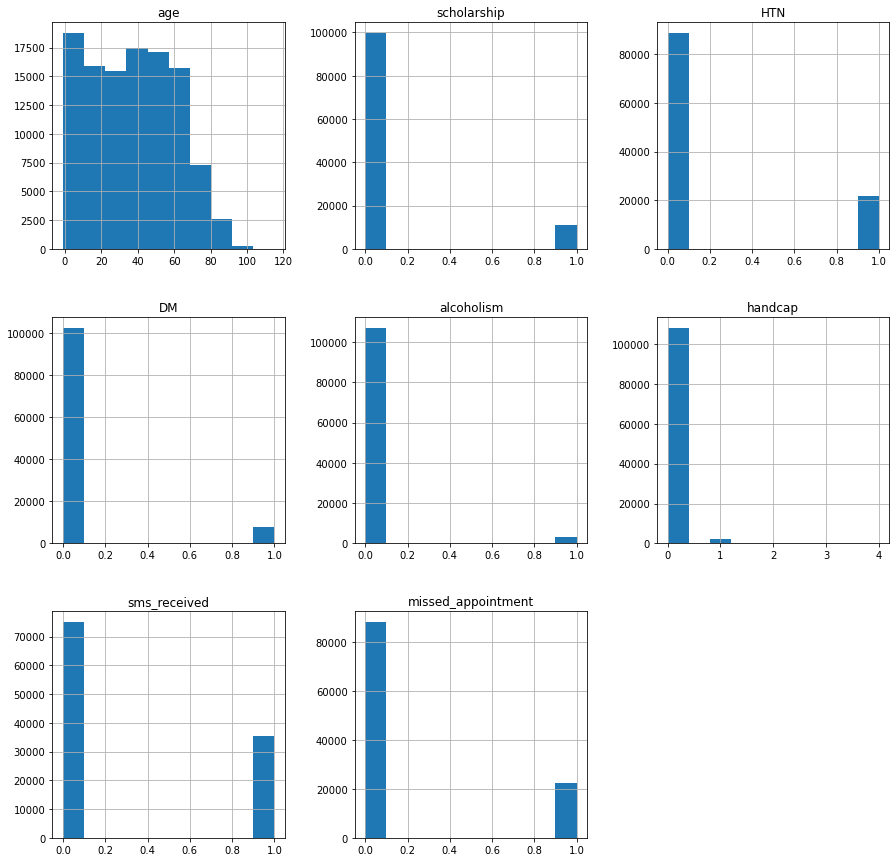

In [20]:
#a general look at the data after cleaning
df.hist(figsize=(15, 15));

>**Findings:**
>
> Hypertension is the highest chronic disease.
>
> Patients with disabilities are so low.
>
> Patients received SMS, are around half the paients who didn't receive SMS.
>
> Patients missed the appointment are about quarter of the patients attended.

In [21]:
#catigorize the patients who came and didn't came
didnot_attend= df.missed_appointment == 1
attended= df.missed_appointment == 0

find both counts:

In [22]:
df[didnot_attend].count()

gender                22319
appointment_day       22319
age                   22319
neighbourhood         22319
scholarship           22319
HTN                   22319
DM                    22319
alcoholism            22319
handcap               22319
sms_received          22319
missed_appointment    22319
dtype: int64

In [23]:
df[attended].count()

gender                88208
appointment_day       88208
age                   88208
neighbourhood         88208
scholarship           88208
HTN                   88208
DM                    88208
alcoholism            88208
handcap               88208
sms_received          88208
missed_appointment    88208
dtype: int64

**first make a function having all required values for plotting**

In [24]:
def plot_bar(df_c, t, xlb, ylb):
    """df_c for df.column_name,
    t for title,
    xlb for xlabel,
    ylb for ylabel,
    """
    plt.figure(figsize= [15,8])
    df_c[attended].value_counts().plot(kind="bar", alpha= 0.5, label= "attended", color= "r")
    df_c[didnot_attend].value_counts().plot(kind="bar",alpha= 0.5, label= "didn't_attend", color= "b")
    plt.legend()
    plt.title(t)
    plt.xlabel(xlb)
    plt.ylabel(ylb);

**Make another function to print out the numbers**

In [25]:
def print_nums(df_c, c):
    """ df_c for df.column_name
    c for column_name
    cd for chronic disease
    """
    a= df_c[attended].value_counts()
    d= df_c[didnot_attend].value_counts()
    for x in range(len(a)):
         print("Percentage of Attened", df_c.unique()[x], ": ", str((a[x]/(a[x]+d[x]))*100), "%")
    #for the diseases
    cd= False
    if c in ["HTN", "DM"]:
        cd= True
    
    if cd== True:
        print("1= Has")
        print("0= Doesn't Have")
    #for anyother column
    else:
        if df_c.unique()[x] in [1, 0]:
            print("1= Yes")
            print("0= No")
        #for the disabilityes
        elif df_c.unique()[x] in [4, 3, 2, 1, 0]:
            print("Number represents number of disabilities")

### 1) is the gender of patients affects the missed appointments percentage?

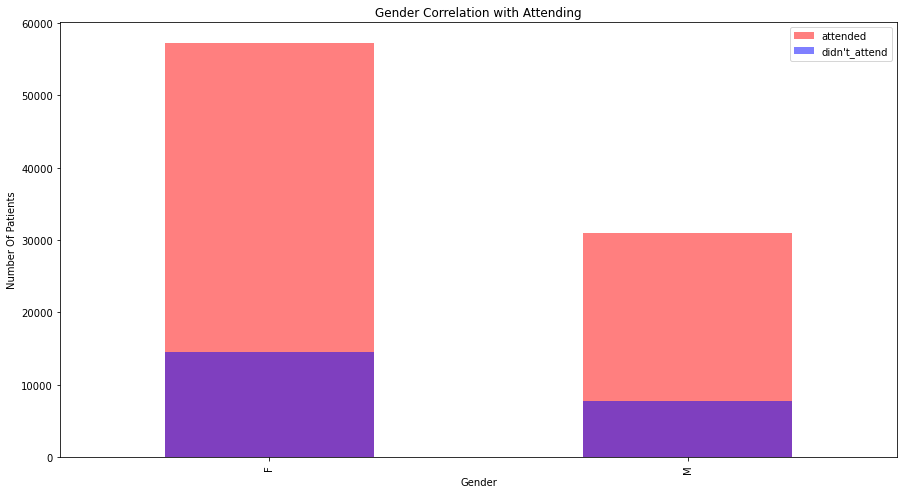

In [26]:
#visualize data
plot_bar(df.gender, "Gender Correlation with Attending", "Gender", "Number Of Patients")

In [27]:
#print numbers to confirm
print_nums(df.gender, "Gender")

Percentage of Attened F :  79.68541202672606 %
Percentage of Attened M :  80.03205211052808 %


*It seems that both genders misses the appointment at the same rate*
> about 20% of females miss the appointment
>
> about 20% of patients with disability/ies miss the appointment

**Gender Is Insignificant**

### 2) is having a disability increases the missed appointments precentage?

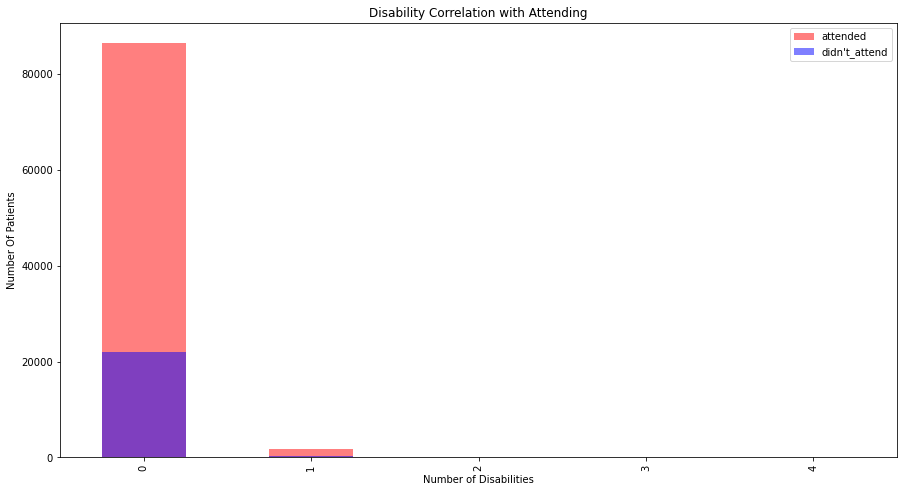

In [28]:
plot_bar(df.handcap, "Disability Correlation with Attending", "Number of Disabilities", "Number Of Patients")

In [29]:
#print numbers to confirm
print_nums(df.handcap, "Handcap")

Percentage of Attened 0 :  79.76469719077258 %
Percentage of Attened 1 :  82.07639569049951 %
Percentage of Attened 2 :  79.78142076502732 %
Percentage of Attened 3 :  76.92307692307693 %
Percentage of Attened 4 :  66.66666666666666 %
Number represents number of disabilities


*It seems that all patients with or without disabilities miss the appointment at the same rate*
> about 20% of patients with no disability miss the appointment
>
> about 20-25% of patients with disability/ies miss the appointment
>
> 4 disabilites instances are low (7) so it can be neglected

**Handcap Is Insignificant**

### 3) Is having a chronic disease affects the missed appointments percentage?

3.1) diabities

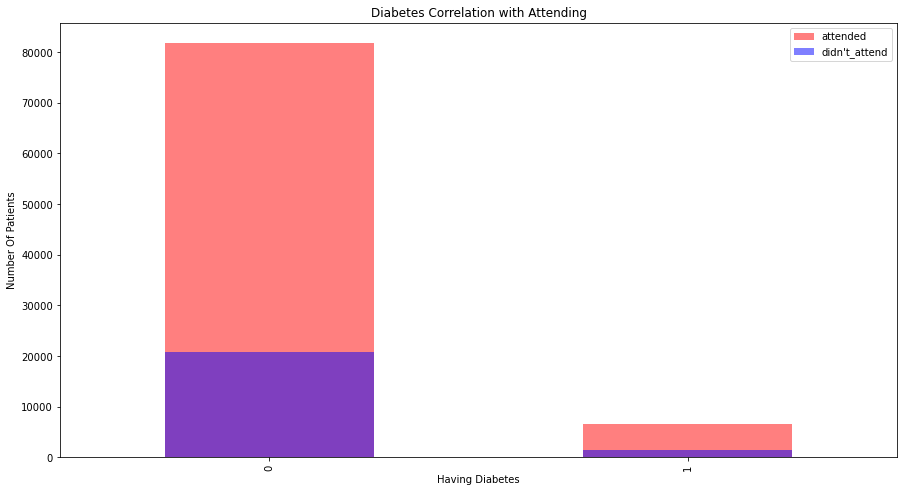

In [30]:
#visualize data
plot_bar(df.DM, "Diabetes Correlation with Attending", "Having Diabetes", "Number Of Patients")

In [31]:
#print numbers to confirm
print_nums(df.DM, "DM")


Percentage of Attened 0 :  79.63717538797474 %
Percentage of Attened 1 :  81.99672667757774 %
1= Has
0= Doesn't Have


*It seems that all patients with or without diabetes miss the appointment at the same rate*
> about 20% of patients with no diabetes miss the appointment
>
> about 20% of patients with diabetes miss the appointment

**Diabetes Is Insignificant**

3.2) Hypertension

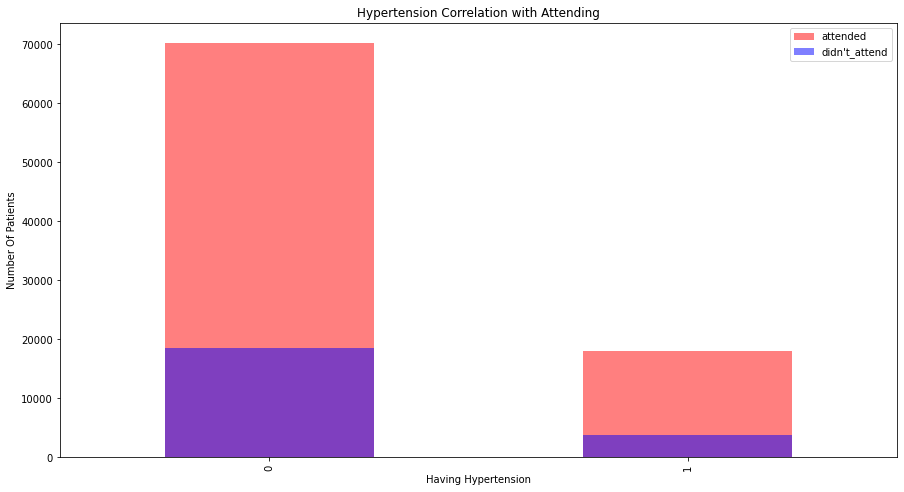

In [32]:
#visualize data
plot_bar(df.HTN, "Hypertension Correlation with Attending", "Having Hypertension", "Number Of Patients")

In [33]:
#print numbers to confirm
print_nums(df.HTN, "HTN")

Percentage of Attened 1 :  79.09631900457589 %
Percentage of Attened 0 :  82.69804137424889 %
1= Has
0= Doesn't Have


*It seems that all patients with or without hypertension miss the appointment at the same rate*
> about 20% of patients with no hypertension miss the appointment
>
> about 20% of patients with hypertension miss the appointment

**Hypertension Is Insignificant**

### 4) Is being alcoholic affects the missed appointments percentage?


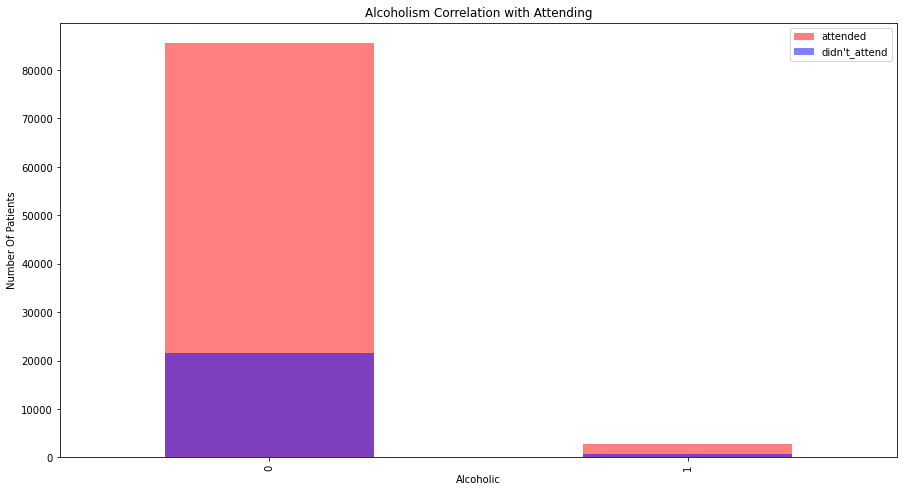

In [34]:
#visualize data
plot_bar(df.alcoholism, "Alcoholism Correlation with Attending", "Alcoholic", "Number Of Patients")

In [35]:
#print numbers to confirm
print_nums(df.alcoholism, "Alcholism")

Percentage of Attened 0 :  79.8053505276811 %
Percentage of Attened 1 :  79.85119047619048 %
1= Yes
0= No


*It seems that all patients alcoholic or not miss the appointment at the same rate*
> about 20% of patients that are not alcoholic miss the appointment
>
> about 20% of alcoholic patients miss the appointment

**Alcoholism Is Insignificant**

### 5) Are the patients enrolled in Bolsa Famillia Project go to thier appointments more than others?


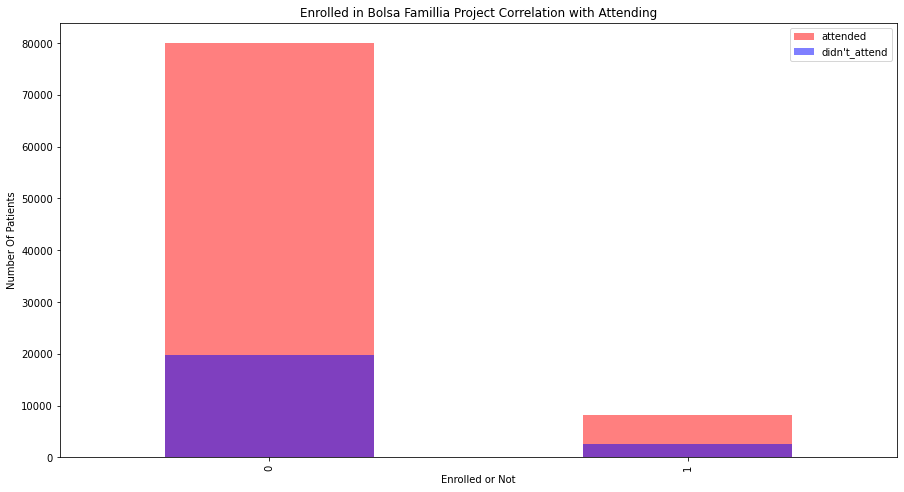

In [36]:
#visualize data
plot_bar(df.scholarship, "Enrolled in Bolsa Famillia Project Correlation with Attending", "Enrolled or Not", "Number Of Patients")

In [37]:
#print numbers to confirm
print_nums(df.scholarship, "scholarship")

Percentage of Attened 0 :  80.19284409929163 %
Percentage of Attened 1 :  76.26369579228432 %
1= Yes
0= No


*surprisingly, It seems that  patients enrolled in the project miss the appointment more but it is a very small difference: 4% difference*
> about 24% of patients enrolled miss the appointment
>
> about 20% of patients not enrolled miss the appointment

**Enrollment in Bollsa Famillia Project Is Insignificant**

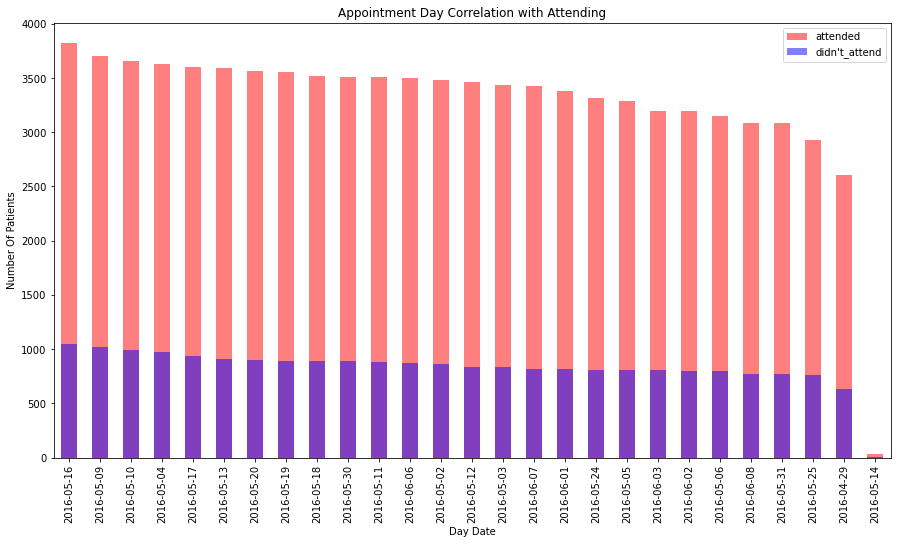

In [38]:
#visualize data
plot_bar(df.appointment_day, "Appointment Day Correlation with Attending", "Day Date", "Number Of Patients")


*seems that 14-5-2016 had a very low appointments*
> it is only one day, so we can't apply that the date is significant for this instance alone while all other instance are almost the same.

In [39]:
#print numbers to confirm
print_nums(df.appointment_day, "appointment_day")

Percentage of Attened 2016-04-29 :  78.45110928512736 %
Percentage of Attened 2016-05-03 :  78.42929720575783 %
Percentage of Attened 2016-05-10 :  78.63910422049956 %
Percentage of Attened 2016-05-17 :  78.84322678843226 %
Percentage of Attened 2016-05-24 :  79.38257993384785 %
Percentage of Attened 2016-05-31 :  79.86203827325322 %
Percentage of Attened 2016-05-02 :  79.85659870042572 %
Percentage of Attened 2016-05-30 :  79.95055068554731 %
Percentage of Attened 2016-05-16 :  79.79568671963678 %
Percentage of Attened 2016-05-04 :  79.81818181818183 %
Percentage of Attened 2016-05-19 :  79.85431368085591 %
Percentage of Attened 2016-05-12 :  80.04115226337449 %
Percentage of Attened 2016-05-06 :  80.17955801104972 %
Percentage of Attened 2016-05-20 :  80.54845456658146 %
Percentage of Attened 2016-05-05 :  80.52952202436738 %
Percentage of Attened 2016-05-13 :  80.75925489271398 %
Percentage of Attened 2016-05-09 :  80.62052505966587 %
Percentage of Attened 2016-05-25 :  80.348921734

*It seems that all days almost had the same attendance rate*
> about 20-24% of patients missed the appointment in all days


**Day of Appointment Is Insignificant**

### 7) Is receiving a SMS decreased missed appointments?

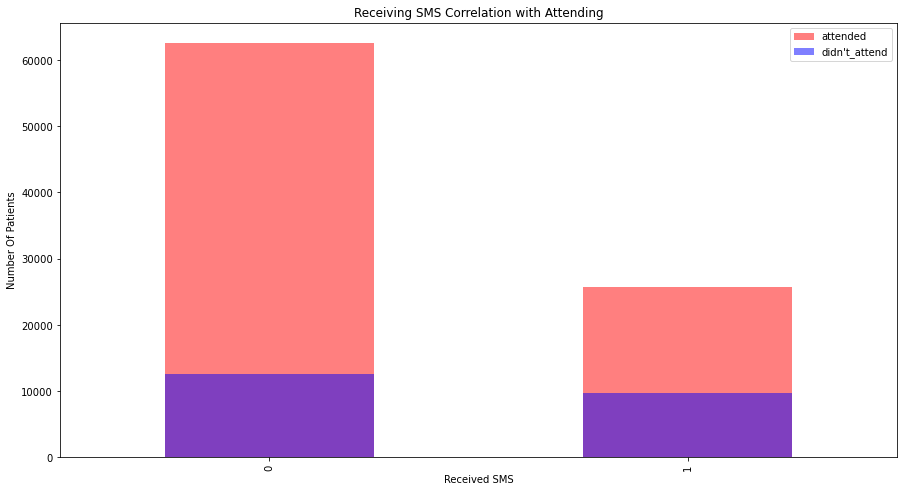

In [40]:
#visualize data
plot_bar(df.sms_received , "Receiving SMS Correlation with Attending", "Received SMS", "Number Of Patients")

In [41]:
#print numbers to confirm
print_nums(df.sms_received, "sms_received")

Percentage of Attened 0 :  83.29668865347458 %
Percentage of Attened 1 :  72.425455160363 %
1= Yes
0= No


*wow, it seems the patients received the SMS tended to miss the appointment more*
> about 17% of patients who didn't receive the SMS missed the appointment 
>
> about 28% of patients who received the SMS missed the appointment, surprisingly

**Receiving SMS Is Significant**

### 8) What hospital have the highest rate of missed appointments?

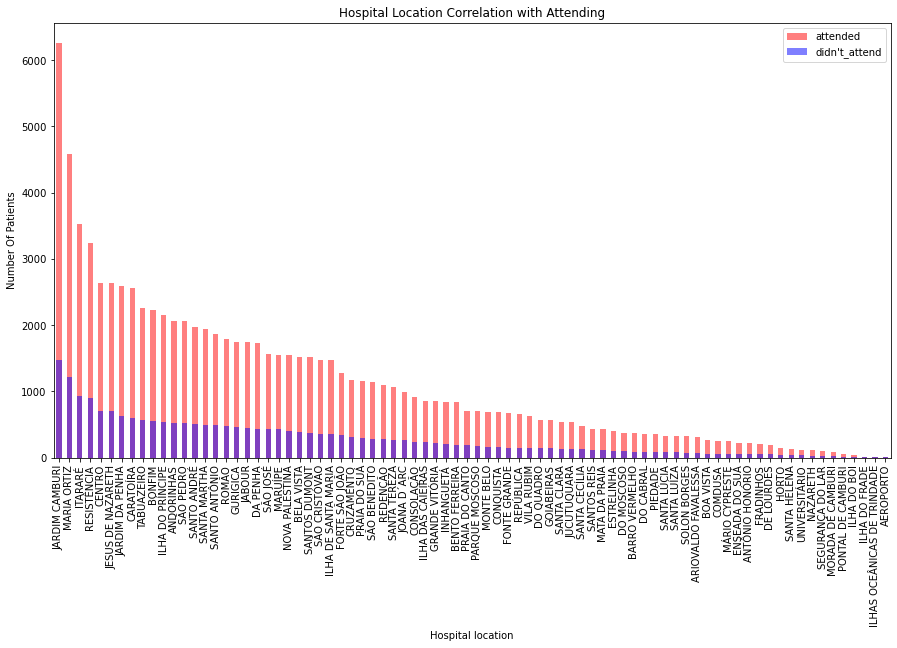

In [42]:
#Visualize data
plot_bar(df.neighbourhood, "Hospital Location Correlation with Attending", "Hospital location", "Number Of Patients")

**some Hospitals had many more appointments than others, especially  ARDIM DA PENHA hospital.**

In [43]:
#print numbers to confirm
print_nums(df.neighbourhood, "neighbourhood")

Percentage of Attened JARDIM DA PENHA :  81.01593883633537 %
Percentage of Attened MATA DA PRAIA :  79.00086132644272 %
Percentage of Attened PONTAL DE CAMBURI :  79.24910071942446 %
Percentage of Attened REPÚBLICA :  78.17919075144508 %
Percentage of Attened GOIABEIRAS :  78.93948472139004 %
Percentage of Attened ANDORINHAS :  79.08025247971146 %
Percentage of Attened CONQUISTA :  80.41589075108628 %
Percentage of Attened NOVA PALESTINA :  81.23809523809524 %
Percentage of Attened DA PENHA :  79.78835978835978 %
Percentage of Attened TABUAZEIRO :  80.16588532275513 %
Percentage of Attened BENTO FERREIRA :  80.21569356638155 %
Percentage of Attened SÃO PEDRO :  79.8374613003096 %
Percentage of Attened SANTA MARTHA :  79.9844539448115 %
Percentage of Attened SÃO CRISTÓVÃO :  79.53263497179694 %
Percentage of Attened MARUÍPE :  79.58007410456979 %
Percentage of Attened GRANDE VITÓRIA :  79.36913895993179 %
Percentage of Attened SÃO BENEDITO :  79.04509283819628 %
Percentage of Attened IL

*seems that all hospitals had the same range of attending except 2 hospitals*
> the normal range for attendance is 78-81%
> 
> Fradinhos Hospital had 91% attendance rate, which is higher than normal.
>
> Ilhas Oceanicas De Trinade Hospital had 50%, Which is signficantly lower than normal.

**Hospital Location Is Significant**

<a id='conclusions'></a>
## Conclusions



>**Findings:**
>
> 1- all features according to the patient is insignificant.
>
> 2- all days had the same rate, so it is insignificant
>
> 3- Receiving SMS, surprisngly, increased missed appointments rate.
>
> 4- Location of Hospital increased the number of instances of making appointment, and some hospitals had much more missed appointment rate.

**Limitations:**
> 1- Almost all data doesn't have an affect on missing the appointment.
>
> 2- Only the location of the hospital has some affect on missing the appointment.